In [1]:
# import and install packages and download some data!

import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())
    
    

In [10]:
# lets do some light reading and Read the data in

await download(path, 'FUELCONSUMPTION_COMB')
path = ('FUELCONSUMPTION_COMB')

<class 'JsException'>: TypeError: Failed to execute 'fetch' on 'WorkerGlobalScope': Failed to parse URL from FUELCONSUMPTION_COMB

In [11]:
df = pd.read_csv('FUELCONSUMPTION_COMB')

# Take a peek at the data frame
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
# select feature we want to use for the regression

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


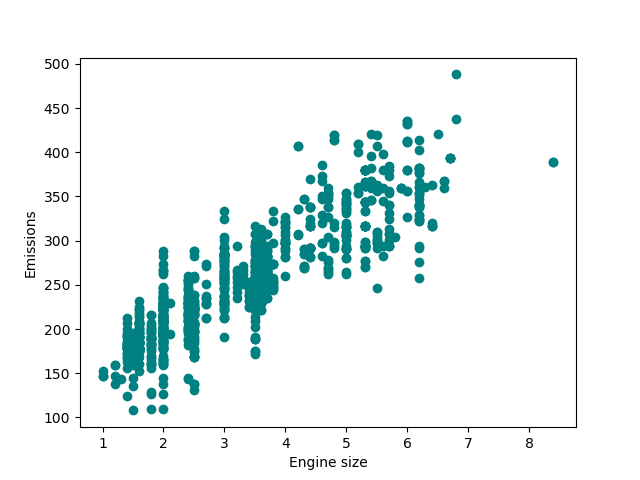

<Figure size 640x480 with 0 Axes>

In [14]:
# plot some values using scatter plot

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='teal')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

In [15]:
# Now lets test and train some data while creaking a mask

msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[msk]

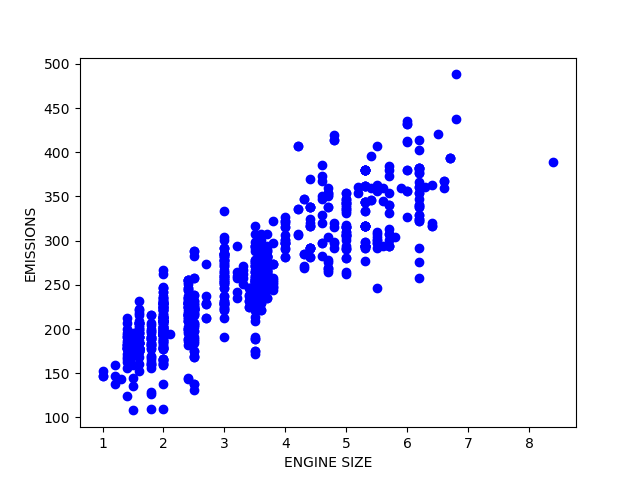

<Figure size 640x480 with 0 Axes>

In [17]:
# train the data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSIONS')
plt.show()

## Making A Multiple Regression Model. 


In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

# print the coefficients
print('Coefficients:', regr.coef_)

Coefficients: [[11.26666696  7.28475758  9.51718995]]


## The Prediction phase 

In [24]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of squares: %2f' % np.mean((y_hat - y)**2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %2f' % regr.score(x,y))

/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual sum of squares: 525.954485
Variance score: 0.868771


### Help youself to some more practice!

use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [26]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print( 'Residual value: %2f' % np.mean((y_hat - y)**2))

print('variance score: %2f' % regr.score(x,y))

/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual value: 831.256055
variance score: 0.792597


In [31]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual value: %2f' % np.mean((y_hat - y)**2))
print('Variance score: %2f' % regr.score(x,y))

/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual value: 1002.331911
Variance score: 0.749913


Using _CITY and _HWY is less accurate. If the variance needs to be close to 1, 
then lets compare varicance scores:
* _COMB: .86
* _CITY: .79
* _HWY: .74
    